In [4]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [8]:
data = Dataset('E:/NetCDF4/MERRA2_300.tavgM_2d_slv_Nx.201001.nc4', mode='r')

In [9]:
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    History: Original file generated: Fri Jul  3 02:53:08 2015 GMT
    Filename: MERRA2_300.tavgM_2d_slv_Nx.201001.nc4
    Comment: GMAO filename: d5124_m2_jan00.tavg1_2d_slv_Nx.monthly.201001.nc4
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2TMNXSLV
    RangeBeginningDate: 2010-01-01
    RangeEndingDate: 2010-01-31
    GranuleID: MERRA2_300.tavgM_2d_slv_Nx.201001.nc4
    ProductionDateTime: Original file generated: Fri Jul  3 02:53:08 2015 GMT
    LongName: MERRA2 tavg1_2d_slv_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Single-Level Diagnostics Monthly Mean
    Title: MERRA2 tavg1_2d_slv_Nx: 2d,1-Hourly,Time-Averaged,S

In [10]:
lons = data.variables['lon'][:]
lats = data.variables['lat'][:]
lon , lat = np.meshgrid(lons, lats)
T2M = data.variables['T2M'][:,:,]

In [11]:
T2M = T2M[0,:,:]

In [12]:
T2M

masked_array(
  data=[[246.5382 , 246.5382 , 246.5382 , ..., 246.5382 , 246.5382 ,
         246.5382 ],
        [245.76541, 245.76825, 245.77145, ..., 245.757  , 245.75964,
         245.76253],
        [244.91208, 244.91805, 244.92424, ..., 244.89542, 244.90085,
         244.90636],
        ...,
        [242.43242, 242.42134, 242.41017, ..., 242.46556, 242.45447,
         242.44328],
        [242.5045 , 242.49892, 242.49344, ..., 242.52153, 242.51578,
         242.51013],
        [242.77005, 242.77005, 242.77005, ..., 242.77005, 242.77005,
         242.77005]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [13]:
T2M.min()

230.71231

In [14]:
T2M.max()

309.03098

C:\Users\arad7\AppData\Local\Programs\Python\Python39\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


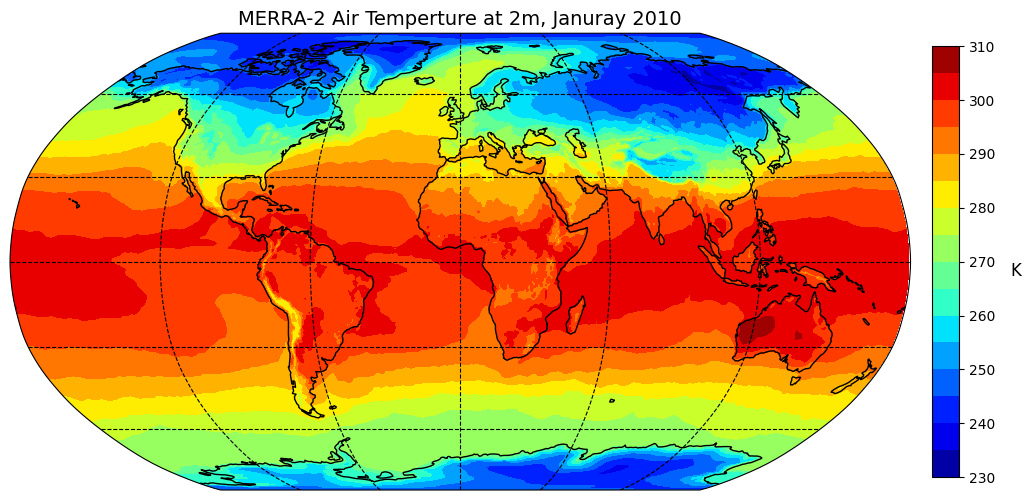

In [15]:
fig = plt.figure(figsize=(14,7))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines(resolution='110m', linewidth=1)
ax.gridlines(linestyle='--', color='black')
#####
clevs = np.arange(230, 311, 5)
plt.contourf(lon, lat, T2M, clevs, transform=ccrs.PlateCarree(), cmap=plt.cm.jet)
plt.title('MERRA-2 Air Temperture at 2m, Januray 2010', size=14)
cb = plt.colorbar(ax=ax, orientation='vertical', pad=0.02, aspect=16, shrink=0.8)
cb.set_label('K', size=12, rotation=0, labelpad=15)
cb.ax.tick_params(labelsize=10)